# Tests

#### Here are some tests I did while working in this project. This notebook doesn't have to be co

In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, LineString, Polygon
import itertools

C:\Users\gabri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
streets =  gpd.read_file('../../data/StreetNetwork/G2_edges.shp')
buildings = gpd.read_file('../../data/Buildings/buildings.geojson')
maracana = gpd.read_file('../../data/Maracana/maracana.geojson')
ameba = gpd.read_file('../../data/Ameba_Area/Ameba_Area.geojson')
final_map = gpd.read_file('../../data/RIO DE JANEIRO MAPS/final_map/final_map.geojson')
neighborhoods = gpd.read_file('../../data/RIO DE JANEIRO MAPS/RJ-BAIRRO/RJ-BAIRRO.shp')

                      
location_point = (-22.911667, -43.230278)
dist = 2300
parking_dist = 1000

<AxesSubplot:>

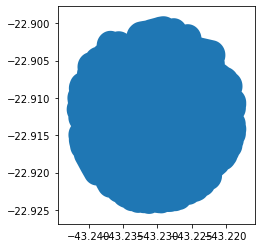

In [4]:
ameba.plot()

<AxesSubplot:>

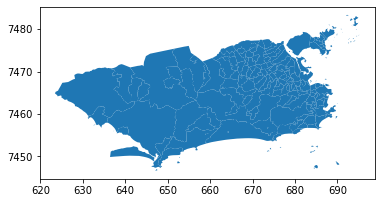

In [5]:
neighborhoods.plot()

In [6]:
neighborhoods = neighborhoods.to_crs("EPSG:4326")

<AxesSubplot:>

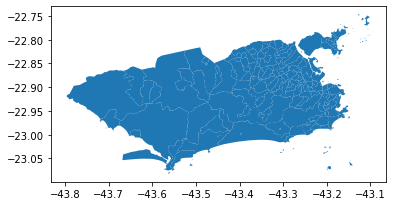

In [7]:
neighborhoods.plot()

<AxesSubplot:>

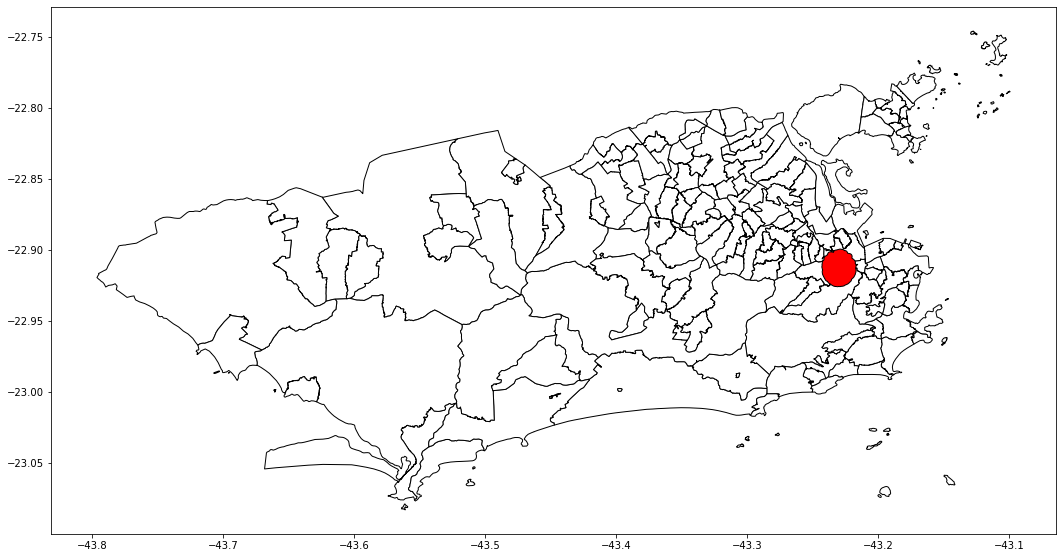

In [8]:
ax = neighborhoods.plot(color='white', edgecolor='black', figsize=(18,10))
ameba.plot(ax=ax, color='red', edgecolor='black', figsize=(18,10))

In [9]:
test_map = pd.concat([ameba, neighborhoods], ignore_index=True)

<AxesSubplot:>

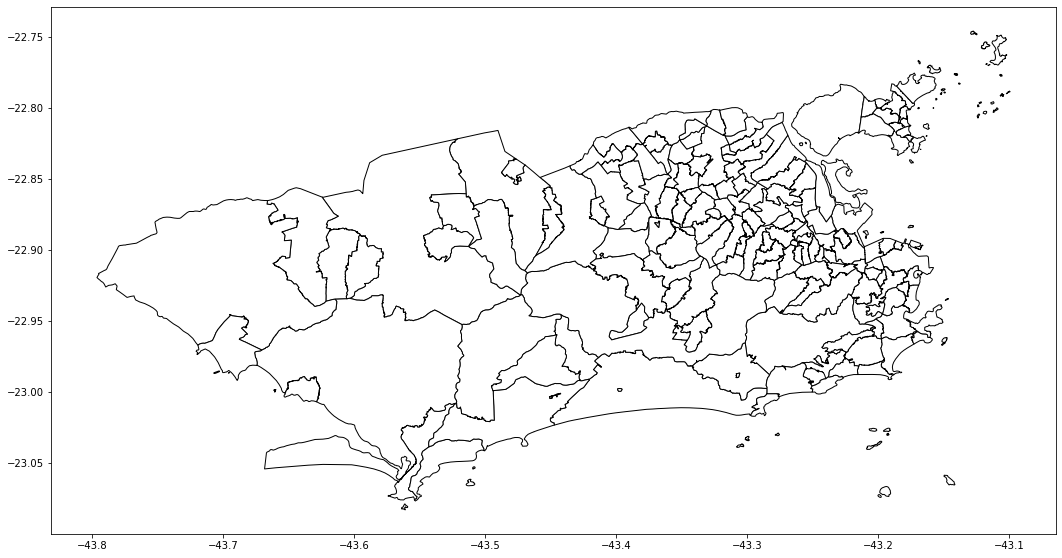

In [10]:
test_map.plot(color='white', edgecolor='black', figsize=(18,10))

In [11]:
test_map

,geometry,NM_BAIRRO,V002
0,"POLYGON ((-43.22058 -22.92036, -43.22058 -22.9...",NaN,NaN
1,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8...",Abolição,11356.0
2,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8...",Acari,26967.0
3,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9...",Alto da Boa Vista,9189.0
4,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8...",Anchieta,55634.0
...,...,...,...
156,"POLYGON ((-43.36708 -22.89711, -43.36718 -22.8...",Vila Valqueire,32232.0
157,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8...",Vila da Penha,25462.0
158,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8...",Vista Alegre,8622.0
159,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8...",Zumbi,2016.0


In [12]:
# get list of geometries
geoms = test_map['geometry'].tolist()

In [13]:
# iterate over all combinations of polygons and get the intersections (overlaps)
overlaps = gpd.GeoDataFrame(gpd.GeoSeries([poly[0].intersection(poly[1]) for poly in itertools.combinations(geoms, 2) if poly[0].intersects(poly[1])]), columns=['geometry'])

<AxesSubplot:>

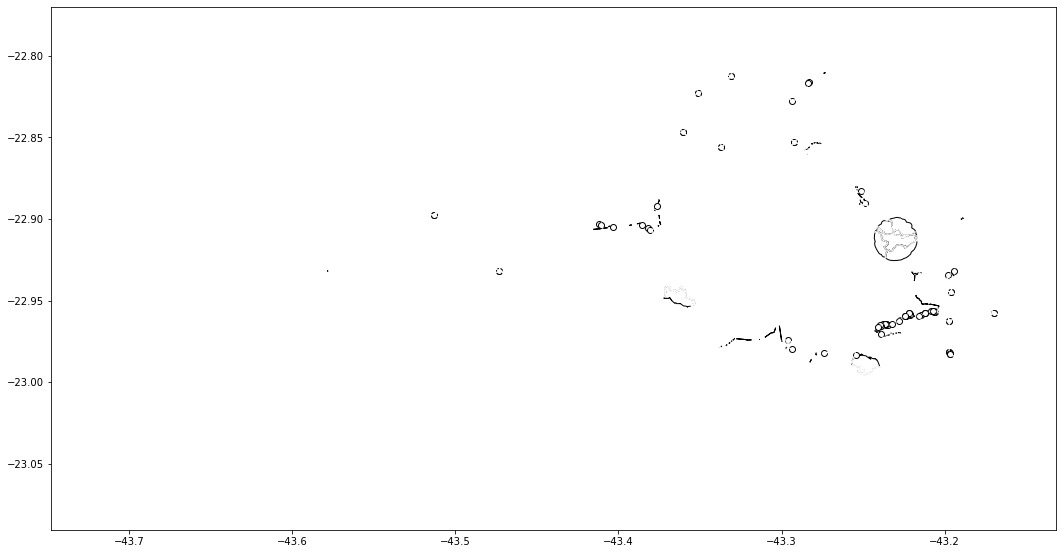

In [14]:
overlaps.plot(color='white', edgecolor='black', figsize=(18,10))

In [15]:
data = []
for index, orig in neighborhoods.iterrows():
    for index2, ref in ameba.iterrows():      
        if ref['geometry'].intersects(orig['geometry']): 
         data.append({'geometry':ref['geometry'].intersection(orig['geometry'])})

for geom in data: 
   print(geom)

{'geometry': <POLYGON ((-43.241 -22.904, -43.241 -22.904, -43.241 -22.904, -43.241 -22.90...>}
{'geometry': <POLYGON ((-43.217 -22.91, -43.217 -22.911, -43.217 -22.911, -43.217 -22.911...>}
{'geometry': <MULTIPOLYGON (((-43.218 -22.908, -43.218 -22.908, -43.218 -22.908, -43.218 ...>}
{'geometry': <POLYGON ((-43.234 -22.9, -43.234 -22.9, -43.234 -22.9, -43.234 -22.9, -43.2...>}
{'geometry': <POLYGON ((-43.243 -22.908, -43.243 -22.908, -43.243 -22.908, -43.243 -22.90...>}
{'geometry': <POLYGON ((-43.221 -22.92, -43.221 -22.921, -43.221 -22.921, -43.221 -22.921...>}
{'geometry': <POLYGON ((-43.236 -22.924, -43.237 -22.924, -43.237 -22.924, -43.237 -22.92...>}


In [16]:
inter = gpd.overlay(neighborhoods, ameba, how='intersection')
inter

,NM_BAIRRO,V002,geometry
0,Mangueira,17574.0,"POLYGON ((-43.23370 -22.90061, -43.23375 -22.9..."
1,Maracanã,25213.0,"POLYGON ((-43.23394 -22.91898, -43.23388 -22.9..."
2,Praça da Bandeira,8585.0,"MULTIPOLYGON (((-43.21732 -22.91211, -43.21759..."
3,São Cristóvão,24602.0,"POLYGON ((-43.22860 -22.90654, -43.23001 -22.9..."
4,São Francisco Xavier,8307.0,"POLYGON ((-43.24111 -22.90458, -43.24083 -22.9..."
5,Tijuca,163095.0,"POLYGON ((-43.23628 -22.92388, -43.23624 -22.9..."
6,Vila Isabel,85770.0,"POLYGON ((-43.24206 -22.90770, -43.24172 -22.9..."


<AxesSubplot:>

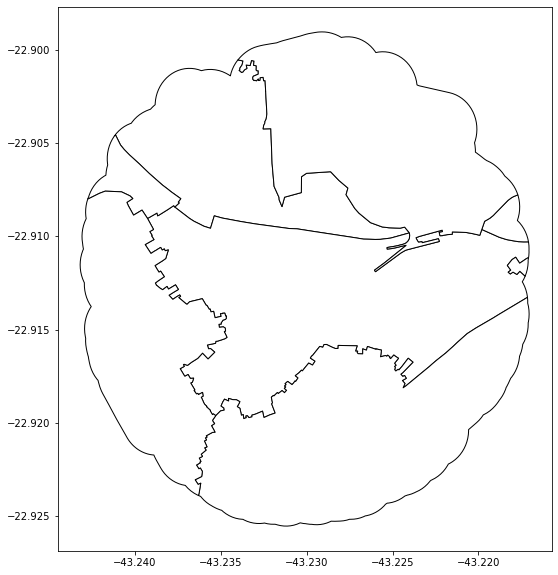

In [17]:
inter.plot(color='white', edgecolor='black', figsize=(18,10))

In [18]:
res_union = inter.overlay(neighborhoods, how='symmetric_difference')

<AxesSubplot:>

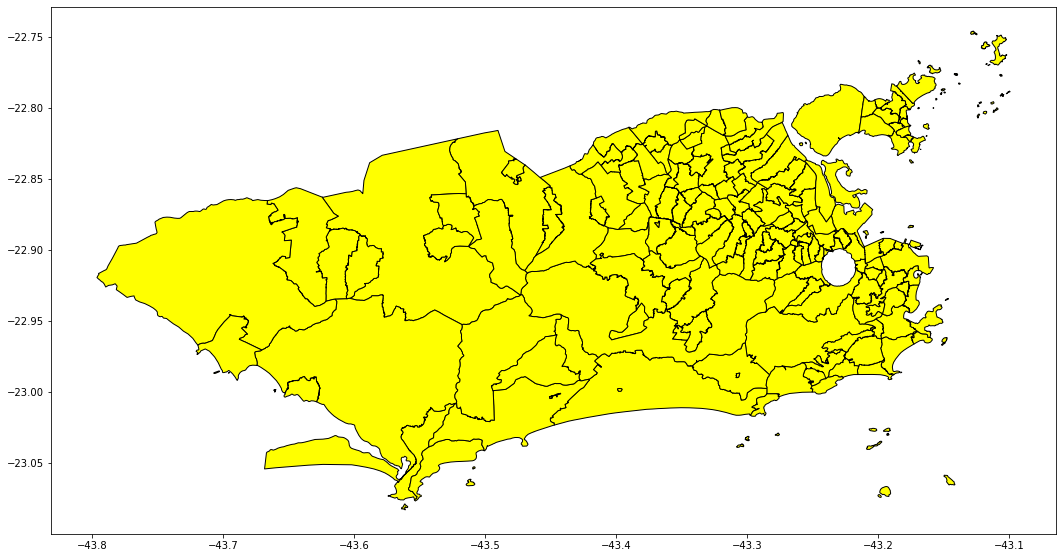

In [19]:
res_union.plot(color='yellow', edgecolor='black', figsize=(18,10))

In [20]:
final_map = pd.concat([res_union, ameba], ignore_index=True)

<AxesSubplot:>

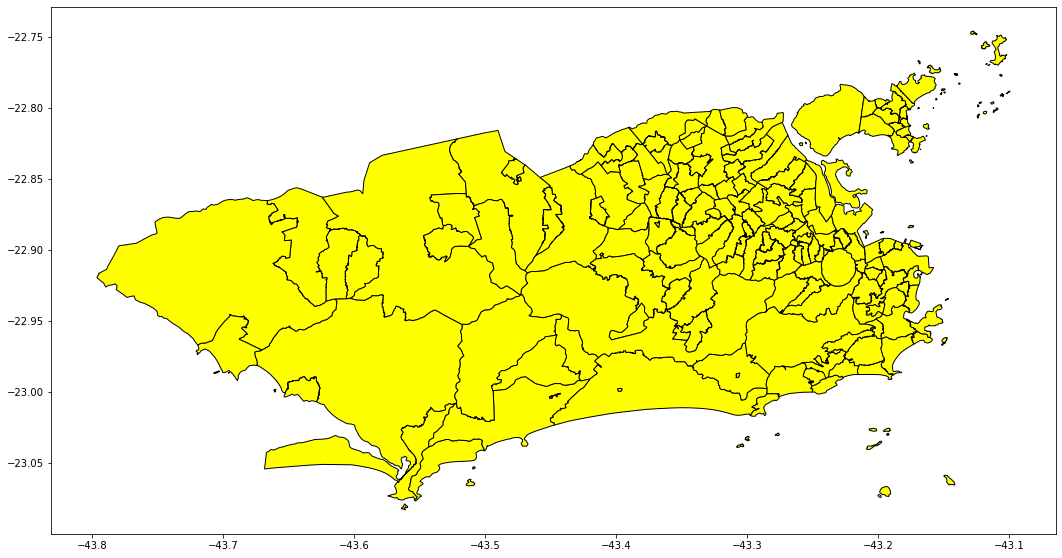

In [21]:
final_map.plot(color='yellow', edgecolor='black', figsize=(18,10))

In [22]:
final_map

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
0,Mangueira,17574.0,NaN,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."
1,NaN,NaN,Abolição,11356.0,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8..."
2,NaN,NaN,Acari,26967.0,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8..."
3,NaN,NaN,Alto da Boa Vista,9189.0,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
4,NaN,NaN,Anchieta,55634.0,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8..."
...,...,...,...,...,...
157,NaN,NaN,Vila da Penha,25462.0,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
158,NaN,NaN,Vista Alegre,8622.0,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."
159,NaN,NaN,Zumbi,2016.0,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8..."
160,NaN,NaN,Água Santa,7594.0,"POLYGON ((-43.30348 -22.91473, -43.30400 -22.9..."


In [27]:
row1 = final_map[final_map["NM_BAIRRO_2"] == "Mangueira"]
row1

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
87,NaN,NaN,Mangueira,17574.0,"POLYGON ((-43.23591 -22.90077, -43.23570 -22.9..."


In [28]:
row2 = final_map[final_map['NM_BAIRRO_1'].notna()]
row2

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
0,Mangueira,17574.0,NaN,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."


In [29]:
merge_rows=[]
merge_rows.append(row1)

In [30]:
merge_rows.append(row2)

In [31]:
merge_rows

[   NM_BAIRRO_1  V002_1 NM_BAIRRO_2   V002_2  \
 87         NaN     NaN   Mangueira  17574.0   
 
                                              geometry  
 87  POLYGON ((-43.23591 -22.90077, -43.23570 -22.9...  ,
   NM_BAIRRO_1   V002_1 NM_BAIRRO_2  V002_2  \
 0   Mangueira  17574.0         NaN     NaN   
 
                                             geometry  
 0  POLYGON ((-43.24119 -22.90463, -43.24119 -22.9...  ]

In [32]:
#merged_df = df2.append(rows_to_merge)
marged_rows = final_map.append(merge_rows)

C:\Users\gabri\AppData\Local\Temp\ipykernel_13900\2535315373.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  marged_rows = final_map.append(merge_rows)


In [36]:
final_map2 = pd.concat([row1, row2], ignore_index=True)

In [37]:
final_map2

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
0,NaN,NaN,Mangueira,17574.0,"POLYGON ((-43.23591 -22.90077, -43.23570 -22.9..."
1,Mangueira,17574.0,NaN,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."


In [38]:
unioned_row = row1.geometry.union(row2.geometry)

C:\Users\gabri\anaconda3\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [42]:
unioned_row

0     None
87    None
dtype: geometry

In [46]:
final_map.loc[1]['geometry'] = unioned_row

C:\Users\gabri\AppData\Local\Temp\ipykernel_13900\3726778144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_map.loc[1]['geometry'] = unioned_row


In [47]:
#df = df.set_geometry(new_geometry, inplace=True)
row3 = row2.set_geometry(unioned_row, inplace=True)

C:\Users\gabri\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [49]:
row3

In [52]:
final_map

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
0,Mangueira,17574.0,NaN,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."
1,NaN,NaN,Abolição,11356.0,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8..."
2,NaN,NaN,Acari,26967.0,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8..."
3,NaN,NaN,Alto da Boa Vista,9189.0,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
4,NaN,NaN,Anchieta,55634.0,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8..."
...,...,...,...,...,...
157,NaN,NaN,Vila da Penha,25462.0,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
158,NaN,NaN,Vista Alegre,8622.0,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."
159,NaN,NaN,Zumbi,2016.0,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8..."
160,NaN,NaN,Água Santa,7594.0,"POLYGON ((-43.30348 -22.91473, -43.30400 -22.9..."


In [16]:
final_test = gpd.read_file('../../data/RIO DE JANEIRO MAPS/final_map/final_map2.geojson')

In [17]:
final_test.head(60)

,ID,name,poly_type,geometry
0,0,BELFORD ROXO,periphery,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6..."
1,1,CACHOEIRAS DE MACACU,periphery,"POLYGON ((-42.79038 -22.37813, -42.78943 -22.3..."
2,2,DUQUE DE CAXIAS,periphery,"POLYGON ((-43.41519 -22.60109, -43.41566 -22.6..."
3,3,GUAPIMIRIM,periphery,"POLYGON ((-42.95809 -22.46615, -42.95703 -22.4..."
4,4,ITABORAÍ,periphery,"POLYGON ((-42.94340 -22.70671, -42.94301 -22.7..."
5,5,ITAGUAÍ,periphery,"MULTIPOLYGON (((-43.85908 -23.07222, -43.86467..."
6,6,JAPERI,periphery,"POLYGON ((-43.62271 -22.64223, -43.62222 -22.6..."
7,7,MAGÉ,periphery,"POLYGON ((-43.10784 -22.53348, -43.10730 -22.5..."
8,8,MANGARATIBA,periphery,"MULTIPOLYGON (((-43.98886 -23.10241, -43.98936..."
9,9,MARICÁ,periphery,"POLYGON ((-42.75662 -22.85058, -42.75590 -22.8..."


In [7]:
final_test

,ID,Name,Type,geometry
0,0,BELFORD ROXO,periphery,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6..."
1,1,CACHOEIRAS DE MACACU,periphery,"POLYGON ((-42.79038 -22.37813, -42.78943 -22.3..."
2,2,DUQUE DE CAXIAS,periphery,"POLYGON ((-43.41519 -22.60109, -43.41566 -22.6..."
3,3,GUAPIMIRIM,periphery,"POLYGON ((-42.95809 -22.46615, -42.95703 -22.4..."
4,4,ITABORAÍ,periphery,"POLYGON ((-42.94340 -22.70671, -42.94301 -22.7..."
...,...,...,...,...
178,178,Vila da Penha,periphery,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
179,179,Vista Alegre,periphery,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."
180,180,Zumbi,periphery,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8..."
181,181,Água Santa,periphery,"POLYGON ((-43.30348 -22.91473, -43.30400 -22.9..."


In [15]:
final_test.shape

(183, 4)